In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pp = sns.load_dataset('penguins')

In [3]:
pp

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


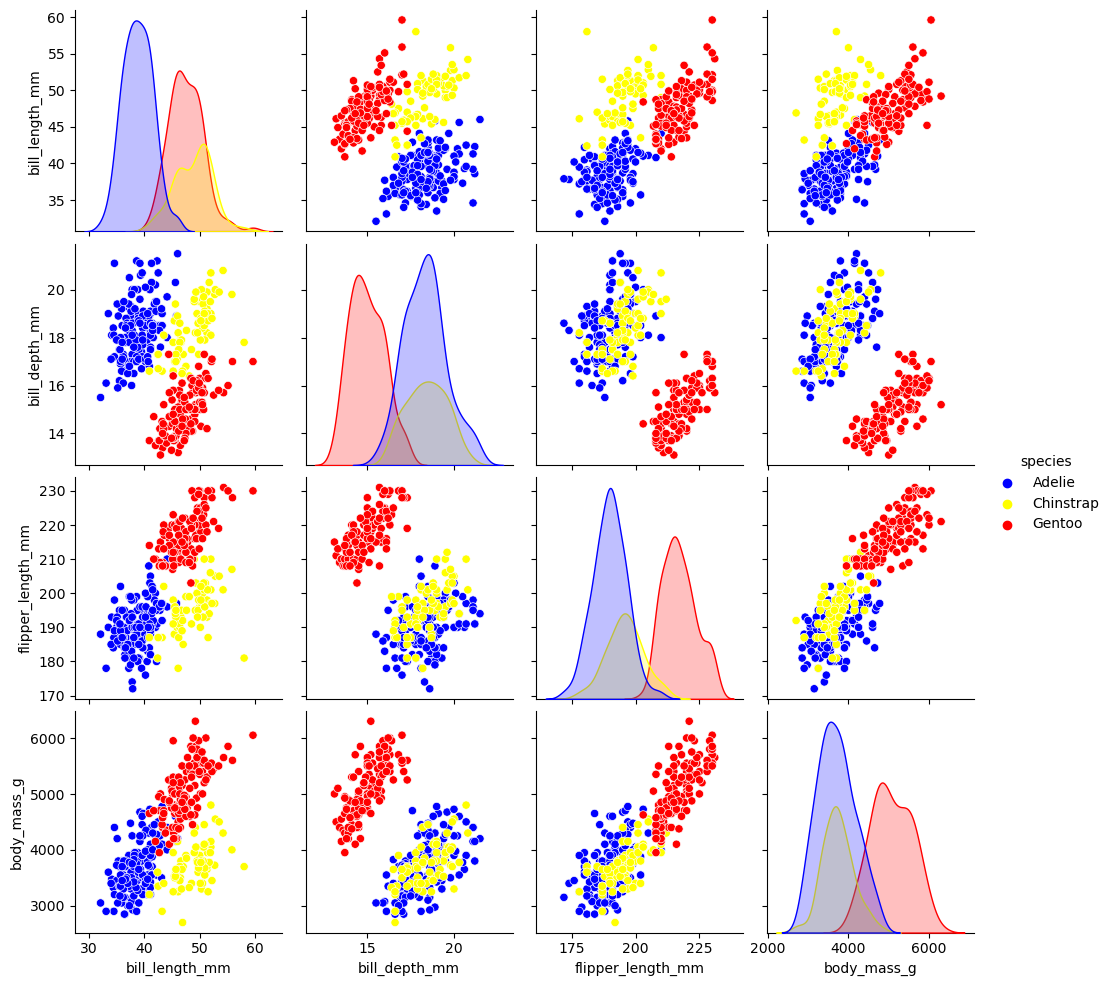

In [7]:
species_colors = {'Adelie': 'blue', 'Chinstrap': 'yellow', 'Gentoo': 'red'}

sns.pairplot(pp, hue='species', palette = species_colors)
plt.show()

In [8]:
pp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [9]:
pp.dropna(inplace=True)

In [10]:
pp

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

X = pp[['flipper_length_mm', 'bill_length_mm']]
y = pp['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define KNN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)

# Train a separate KNN classifier for each species
knn.fit(X_train[y_train == 'Adelie'], y_train[y_train == 'Adelie'])
knn.fit(X_train[y_train == 'Chinstrap'], y_train[y_train == 'Chinstrap'])
knn.fit(X_train[y_train == 'Gentoo'], y_train[y_train == 'Gentoo'])

# Predict the species for the testing set
y_pred = knn.predict(X_test)

# Evaluate the classifiers
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Adelie       0.00      0.00      0.00        31
   Chinstrap       0.00      0.00      0.00        13
      Gentoo       0.34      1.00      0.51        23

    accuracy                           0.34        67
   macro avg       0.11      0.33      0.17        67
weighted avg       0.12      0.34      0.18        67



C:\Users\Owner\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-d

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:22

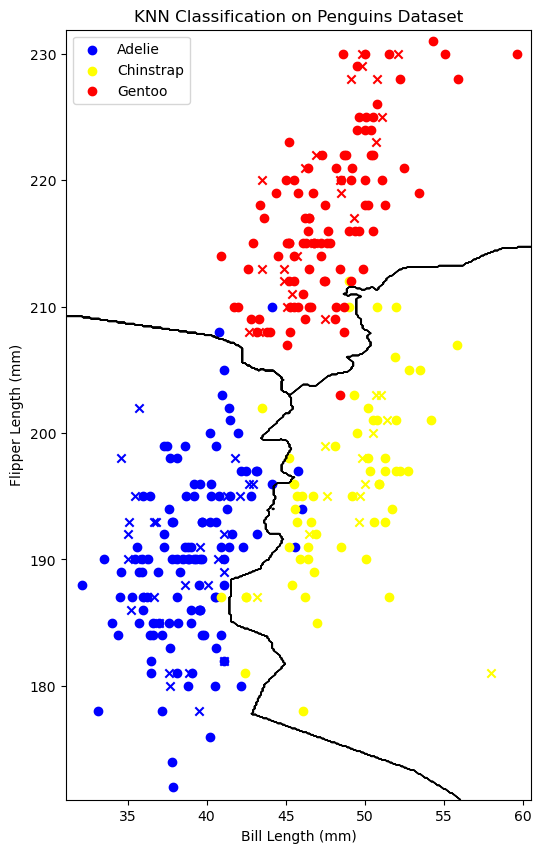

In [17]:
from matplotlib.colors import ListedColormap

from sklearn.preprocessing import LabelEncoder

# Encode the target variable (species) into numerical labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Define colormap for the scatterplot
species_colors = {'Adelie': 'blue', 'Chinstrap': 'yellow', 'Gentoo': 'red'}

# Plot the decision boundary. For that, we will assign a color to each point in the mesh [y_min, y_max]x[x_min, x_max].
x_min, x_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
y_min, y_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

fig, ax = plt.subplots(figsize=(6, 10)) 

for species in np.unique(y_train_encoded):
    knn.fit(X_train, y_train_encoded)
    Z = knn.predict(np.c_[yy.ravel(), xx.ravel()]) 
    ax.contour(xx, yy, Z, colors='black', linewidths=0.5)

# Plot the training points
for species, color in species_colors.items():
    ax.scatter(X_train[y_train_encoded == label_encoder.transform([species])[0]]['bill_length_mm'],  # Swap the x and y axis data
               X_train[y_train_encoded == label_encoder.transform([species])[0]]['flipper_length_mm'],  # Swap the x and y axis data
               label=species,
               color=color)

# Plot the testing points
for species, color in species_colors.items():
    ax.scatter(X_test[y_test_encoded == label_encoder.transform([species])[0]]['bill_length_mm'],  # Swap the x and y axis data
               X_test[y_test_encoded == label_encoder.transform([species])[0]]['flipper_length_mm'],  # Swap the x and y axis data
               marker='x',
               color=color)

ax.set_xlabel('Bill Length (mm)')
ax.set_ylabel('Flipper Length (mm)')  # Transpose the axis labels
ax.set_title('KNN Classification on Penguins Dataset')
ax.legend()
plt.show()